# Imports

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, Bidirectional, LSTM, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

import bz2
import csv
import re


# Loading Datasets

In [24]:
with open("/content/train.ft.txt", "r", encoding='utf-8') as f:
    training_data = [f.readline().strip() for _ in range(3000)]

with open("/content/test.ft.txt", "r", encoding='utf-8') as f:
    test_data = [f.readline().strip() for _ in range(1000)]


# Preparing Dataset

In [25]:
training_data[0]

'__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [26]:
# Split the data into labels and texts
training_labels = [int(re.findall(r'__label__(\d)', line)[0]) for line in training_data]
training_texts = [re.sub(r'__label__\d ', '', line) for line in training_data]

test_labels = [int(re.findall(r'__label__(\d)', line)[0]) for line in test_data]
test_texts = [re.sub(r'__label__\d ', '', line) for line in test_data]

# Convert labels to binary (0 and 1)
training_labels = [0 if label == 1 else 1 for label in training_labels]
test_labels = [0 if label == 1 else 1 for label in test_labels]


In [27]:
test_labels[:20]

[1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]

# Text Cleaning

In [28]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already downloaded
nltk.download('stopwords')

def clean_text(text):
    """Cleans text by lowercasing, removing stopwords, and applying stemming."""
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Convert to lowercase
    text = text.lower()

    # Remove non-alphabetic characters (keep spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize and remove stopwords, apply stemming
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]

    # Join words back into a string
    return " ".join(words)

# Apply function to training and test texts
training_texts = [clean_text(text) for text in training_texts]
test_texts = [clean_text(text) for text in test_texts]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
training_texts[0]

'stune even nongam sound track beauti paint seneri mind well would recomend even peopl hate vid game music play game chrono cross game ever play best music back away crude keyboard take fresher step grate guitar soul orchestra would impress anyon care listen'

# Tokenization

In [30]:
# Tokenization and padding
max_words = 1000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(training_texts)

X_train = tokenizer.texts_to_sequences(training_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)


In [31]:
X_train = np.array(X_train)
print(X_train.shape)
X_test = np.array(X_test)
print(X_test.shape)
y_train = np.array(training_labels)
print(y_train.shape)
y_test = np.array(test_labels)
print(y_test.shape)

(3000, 100)
(1000, 100)
(3000,)
(1000,)


# Training RNN

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5082 - loss: 0.8894 - val_accuracy: 0.5000 - val_loss: 0.7454
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5146 - loss: 0.8350 - val_accuracy: 0.5180 - val_loss: 0.7237
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5224 - loss: 0.8137 - val_accuracy: 0.5150 - val_loss: 0.7216
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5137 - loss: 0.7936 - val_accuracy: 0.5260 - val_loss: 0.7163
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5287 - loss: 0.7725 - val_accuracy: 0.5010 - val_loss: 0.7085
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5399 - loss: 0.7652 - val_accuracy: 0.5010 - val_loss: 0.7077
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5362 - loss: 0.7696 - val_accuracy: 0.5030 - val_loss: 0.7036
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5301 - loss: 0.7615 - val_accuracy: 0.5150 - val_loss: 0.7023
Epoch 9/50
6/6 ━━━━━━

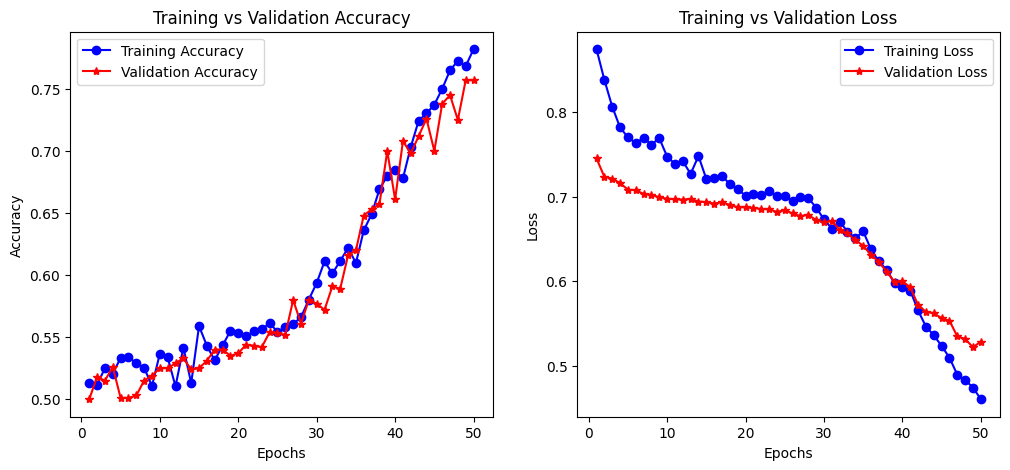

In [32]:


# Define improved RNN model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=300, input_length=max_sequence_length),  # Increased embedding size
    SimpleRNN(128, return_sequences=True, dropout=0.3),  # RNN layer with dropout
    LayerNormalization(),  # Added normalization for stability
    SimpleRNN(128, dropout=0.3),  # Second RNN layer
    LayerNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),  # Extra dense layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile with lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=5e-5), metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Extract values from history
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


In [33]:
# Evaluate with a confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step
Confusion Matrix:
[[362 136]
 [107 395]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       498
           1       0.74      0.79      0.76       502

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



# Training LSTM

In [34]:
# Define improved model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=300, input_length=max_sequence_length),  # Increased embedding size
    Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.2)),  # Added recurrent dropout
    LayerNormalization(),  # Added normalization for stability
    Dropout(0.3),
    Bidirectional(LSTM(128, recurrent_dropout=0.2)),
    LayerNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),  # Extra dense layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile with lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=5e-5), metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 78s 9s/step - accuracy: 0.4914 - loss: 0.8520 - val_accuracy: 0.5430 - val_loss: 0.6932
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 66s 10s/step - accuracy: 0.5097 - loss: 0.7856 - val_accuracy: 0.5540 - val_loss: 0.6801
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 69s 9s/step - accuracy: 0.5182 - loss: 0.7584 - val_accuracy: 0.5660 - val_loss: 0.6790
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.5463 - loss: 0.7126 - val_accuracy: 0.5770 - val_loss: 0.6699
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.5523 - loss: 0.7208 - val_accuracy: 0.5890 - val_loss: 0.6651
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 84s 10s/step - accuracy: 0.5571 - loss: 0.6998 - val_accuracy: 0.6050 - val_loss: 0.6604
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 81s 9s/step - accuracy: 0.5871 - loss: 0.6875 - val_accuracy: 0.6140 - val_loss: 0.6549
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 55s 9s/step - accuracy: 0.5878 - loss: 0.6778 - val_accuracy: 0.6300 - val_loss: 0.6469
Epoch 9/50
6/6 ━━

# Model Evaluation

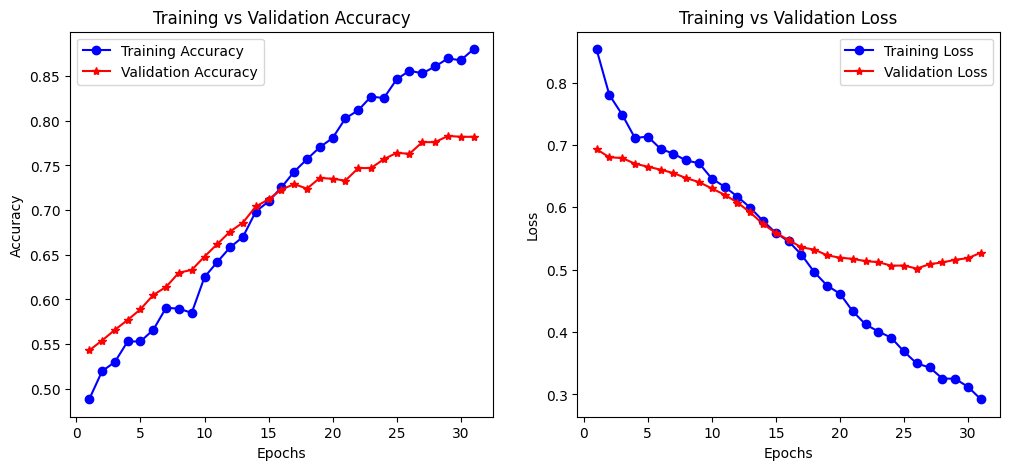

In [35]:
import matplotlib.pyplot as plt

# Extract values from history
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


In [36]:
# Evaluate with a confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 317ms/step
Confusion Matrix:
[[376 122]
 [115 387]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       498
           1       0.76      0.77      0.77       502

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



# Training GRU

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.5124 - loss: 1.1390 - val_accuracy: 0.4830 - val_loss: 0.9401
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5237 - loss: 0.9992 - val_accuracy: 0.5030 - val_loss: 0.8321
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.5235 - loss: 0.9316 - val_accuracy: 0.5260 - val_loss: 0.7767
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.5212 - loss: 0.8834 - val_accuracy: 0.5370 - val_loss: 0.7556
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5499 - loss: 0.8329 - val_accuracy: 0.5430 - val_loss: 0.7511
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.5332 - loss: 0.8015 - val_accuracy: 0.5490 - val_loss: 0.7510
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5387 - loss: 0.7959 - val_accuracy: 0.5470 - val_loss: 0.7483
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.5447 - loss: 0.7802 - val_accuracy: 0.5510 - val_loss: 0.7386
Epoch 9/50
6/6 ━━━━

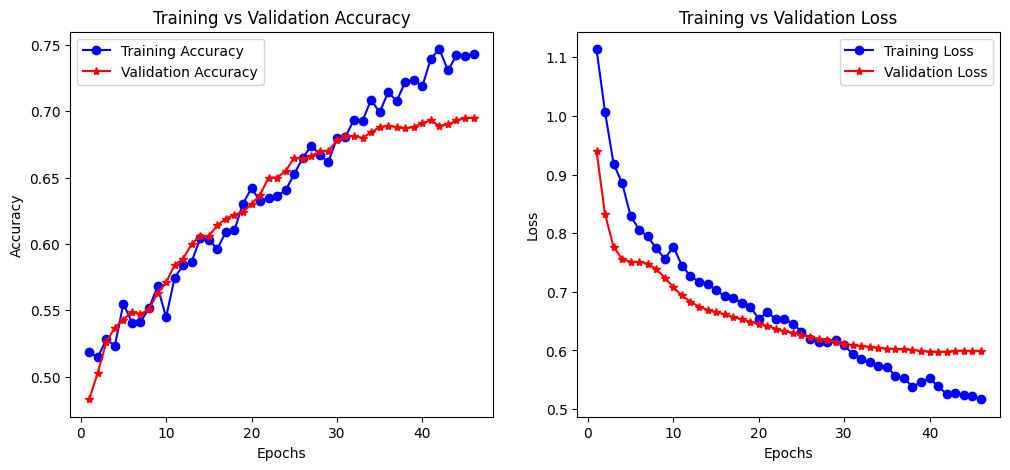

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step
Confusion Matrix:
[[292 206]
 [101 401]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.59      0.66       498
           1       0.66      0.80      0.72       502

    accuracy                           0.69      1000
   macro avg       0.70      0.69      0.69      1000
weighted avg       0.70      0.69      0.69      1000



In [37]:


# Define improved GRU model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=300, input_length=max_sequence_length),  # Increased embedding size
    GRU(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2),  # GRU layer with dropout
    LayerNormalization(),  # Added normalization for stability
    GRU(128, dropout=0.3, recurrent_dropout=0.2),  # Second GRU layer
    LayerNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),  # Extra dense layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile with lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=5e-5), metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Extract values from history
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()



# Evaluate with a confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Detection System

In [46]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_sentiment(text, model, tokenizer, max_sequence_length=100):
    # clean text
    text = clean_text(text)
    # Convert text to sequence
    sequence = tokenizer.texts_to_sequences([text])

    # Pad sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

    # Predict sentiment
    prediction = model.predict(padded_sequence)[0][0]  # Extract scalar value

    # Determine sentiment
    sentiment = "Positive 😊" if prediction > 0.5 else "Negative 😡"

    return sentiment, float(prediction)

# Example usage:
test_sentences = [
    "I love this product! It's amazing.",
    "This is the very bad service I have ever experienced. The is very bad movie",
    "The movie was okay, not great but not terrible either."
]

for sentence in test_sentences:
    sentiment, confidence = predict_sentiment(sentence, model, tokenizer)
    print(f"Text: {sentence}\nPredicted Sentiment: {sentiment} (Confidence: {confidence:.4f})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Text: I love this product! It's amazing.
Predicted Sentiment: Positive 😊 (Confidence: 0.9262)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Text: This is the very bad service I have ever experienced. The is very bad movie
Predicted Sentiment: Negative 😡 (Confidence: 0.1612)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Text: The movie was okay, not great but not terrible either.
Predicted Sentiment: Positive 😊 (Confidence: 0.8465)



In [39]:
model.save("lstm_model.h5")  # Saves architecture, weights & optimizer


import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


2.18.0


In [41]:
!pip install gradio


In [42]:
# ✅ Imports
import gradio as gr
from tensorflow.keras.models import load_model
import pickle
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ✅ Load saved model and tokenizer
model = load_model("lstm_model.h5")

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# ✅ Text cleaning function (same as training time)
def clean_text(text):
    import re
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    import nltk
    nltk.download('stopwords', quiet=True)

    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

# ✅ Sentiment prediction function
def predict_sentiment(text):
    cleaned = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(sequence, maxlen=100)
    pred = model.predict(padded)[0][0]
    label = "Positive 😊" if pred > 0.5 else "Negative 😞"
    return f"Prediction: {label}\nConfidence Score: {pred:.2f}"

# ✅ Gradio UI
gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=4, placeholder="Enter an Amazon review here..."),
    outputs="text",
    title="Amazon Review Sentiment Analyzer",
    description="Enter a product review to detect if it's Positive or Negative."
).launch(share=True)  # ✅ This gives you a public link


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://08caa8bc133066b112.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Converting gradio code in .py file

In [47]:
with open("app.py", "w") as f:
    f.write('''import gradio as gr
from tensorflow.keras.models import load_model
import pickle
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ✅ Load saved model and tokenizer
model = load_model("lstm_model.h5")

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# ✅ Text cleaning function (same as training time)
def clean_text(text):
    import re
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    import nltk
    nltk.download('stopwords', quiet=True)

    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

# ✅ Sentiment prediction function
def predict_sentiment(text):
    cleaned = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(sequence, maxlen=100)
    pred = model.predict(padded)[0][0]
    label = "Positive 😊" if pred > 0.5 else "Negative 😞"
    return f"Prediction: {label}\nConfidence Score: {pred:.2f}"

# ✅ Gradio UI
gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=4, placeholder="Enter an Amazon review here..."),
    outputs="text",
    title="Amazon Review Sentiment Analyzer",
    description="Enter a product review to detect if it's Positive or Negative."
).launch()
''')
